In [1]:
import sys
sys.path.append("../Common")

import CommonYFinance, CommonBinance, CommonMT5, CommonMongoDBConnector, CommonBacktest

In [2]:
symbol = 'ACB.VN'
from_date = '2023-09-20'
to_date = '2024-02-21'
interval = '1d'
data = CommonYFinance.CommonYFinance.loaddataYFinance(symbol, from_date, to_date, interval)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Datetime,Open,High,Low,Close,Volume
0,2023-09-20,22300.0,22550.0,22250.0,22450.0,7194700
1,2023-09-21,22400.0,22550.0,22350.0,22400.0,7916000
2,2023-09-22,22200.0,22500.0,22100.0,22300.0,12248000
3,2023-09-25,22300.0,22350.0,22000.0,22000.0,10096900
4,2023-09-26,22050.0,22250.0,21850.0,21900.0,9499200
...,...,...,...,...,...,...
97,2024-02-07,27850.0,28200.0,27850.0,28000.0,12727500
98,2024-02-15,28050.0,28400.0,27200.0,27200.0,15244300
99,2024-02-16,27500.0,27600.0,27300.0,27600.0,9595400
100,2024-02-19,27700.0,27700.0,27200.0,27700.0,12966900


In [4]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Mean Squared Error: 45929.33006535948


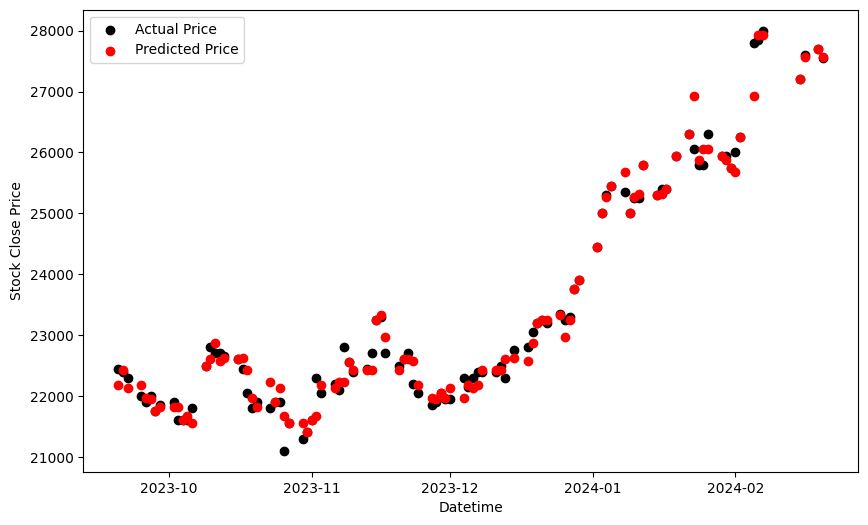

In [5]:
# Đảm bảo cột 'Datetime' được hiểu là kiểu dữ liệu datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Sắp xếp dataframe theo thời gian
data.sort_values(by='Datetime', inplace=True)

# Tạo một đặc trưng mới có thể là ngày (hoặc một đặc trưng khác) để sử dụng trong mô hình
# Trong ví dụ này, giả sử bạn muốn sử dụng giá mở (Open) làm đặc trưng
X = data[['Open']]

# Sử dụng cột 'Close' làm target
y = data['Close']

# Khởi tạo và huấn luyện mô hình cây quyết định
model = DecisionTreeRegressor()
model.fit(X, y)

# Dự đoán giá cổ phiếu trên toàn bộ tập kiểm thử
predictions = model.predict(X)

# Đánh giá hiệu suất mô hình bằng cách sử dụng Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))
# Vẽ biểu đồ so sánh giữa giá thực tế và giá dự đoán
plt.scatter(data['Datetime'], y, color='black', label='Actual Price')
plt.scatter(data['Datetime'], predictions, color='red', label='Predicted Price')
plt.xlabel('Datetime')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()


In [6]:
data['Predict_Close'] = predictions
data
data['Percent_Pc_C'] = ( data['Predict_Close'] - data['Close'] ) / data['Close'] * 100
data['Chap nhan'] = ''

# data['Chap nhan'] = 'Chấp nhận' if abs(data['Percent_Pc_C']) <= 1 else 'Không chấp nhận'
data['Chap nhan'] = data['Percent_Pc_C'].apply(lambda x: 'Chap nhan' if abs(x) <= 1 else 'Khong chap nhan')

data

# Vi du: Do chenh lech < 1% la "Chap nhan" => Nguoc lai: Xuat ghi la "Khong chap nhan"

,Datetime,Open,High,Low,Close,Volume,Predict_Close,Percent_Pc_C,Chap nhan
0,2023-09-20,22300.0,22550.0,22250.0,22450.0,7194700,22183.333333,-1.187825,Khong chap nhan
1,2023-09-21,22400.0,22550.0,22350.0,22400.0,7916000,22425.000000,0.111607,Chap nhan
2,2023-09-22,22200.0,22500.0,22100.0,22300.0,12248000,22133.333333,-0.747384,Chap nhan
3,2023-09-25,22300.0,22350.0,22000.0,22000.0,10096900,22183.333333,0.833333,Chap nhan
4,2023-09-26,22050.0,22250.0,21850.0,21900.0,9499200,21960.000000,0.273973,Chap nhan
...,...,...,...,...,...,...,...,...,...
97,2024-02-07,27850.0,28200.0,27850.0,28000.0,12727500,27925.000000,-0.267857,Chap nhan
98,2024-02-15,28050.0,28400.0,27200.0,27200.0,15244300,27200.000000,0.000000,Chap nhan
99,2024-02-16,27500.0,27600.0,27300.0,27600.0,9595400,27575.000000,-0.090580,Chap nhan
100,2024-02-19,27700.0,27700.0,27200.0,27700.0,12966900,27700.000000,0.000000,Chap nhan


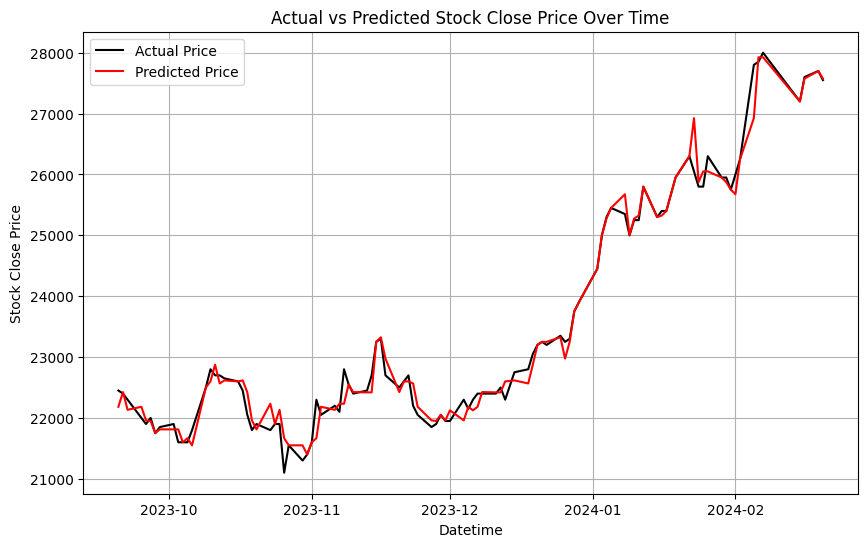

In [7]:
# Vẽ biểu đồ đường của giá cổ phiếu thực tế và giá cổ phiếu dự đoán
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], y, label='Actual Price', color='black')
plt.plot(data['Datetime'], predictions, label='Predicted Price', color='red')
plt.xlabel('Datetime')
plt.ylabel('Stock Close Price')
plt.title('Actual vs Predicted Stock Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Lấy cây quyết định từ mô hình
tree = model.tree_

# Hiển thị quy tắc quyết định trong cây
print("Decision Tree Rules:")
print('Node count', tree.node_count)
for node in range(tree.node_count):
    feature = tree.feature[node]
    threshold = tree.threshold[node]
    if tree.children_left[node] == tree.children_right[node]:  # Node lá
        value = tree.value[node]
        print(f"Leaf node {node}: Predicted value = {value}")
    else:  # Node chia
        print(f"Node {node}: If feature {feature} <= {threshold}, go to node {tree.children_left[node]}, else go to node {tree.children_right[node]}")


Decision Tree Rules:
Node count 107
Node 0: If feature 0 <= 23925.0, go to node 1, else go to node 64
Node 1: If feature 0 <= 22475.0, go to node 2, else go to node 39
Node 2: If feature 0 <= 22075.0, go to node 3, else go to node 28
Node 3: If feature 0 <= 21650.0, go to node 4, else go to node 13
Node 4: If feature 0 <= 21375.0, go to node 5, else go to node 6
Leaf node 5: Predicted value = [[21400.]]
Node 6: If feature 0 <= 21575.0, go to node 7, else go to node 12
Node 7: If feature 0 <= 21425.0, go to node 8, else go to node 9
Leaf node 8: Predicted value = [[21600.]]
Node 9: If feature 0 <= 21500.0, go to node 10, else go to node 11
Leaf node 10: Predicted value = [[21550.]]
Leaf node 11: Predicted value = [[21600.]]
Leaf node 12: Predicted value = [[21550.]]
Node 13: If feature 0 <= 21725.0, go to node 14, else go to node 15
Leaf node 14: Predicted value = [[22500.]]
Node 15: If feature 0 <= 21875.0, go to node 16, else go to node 21
Node 16: If feature 0 <= 21775.0, go to node 

Mean Squared Error: 140738.63636363635


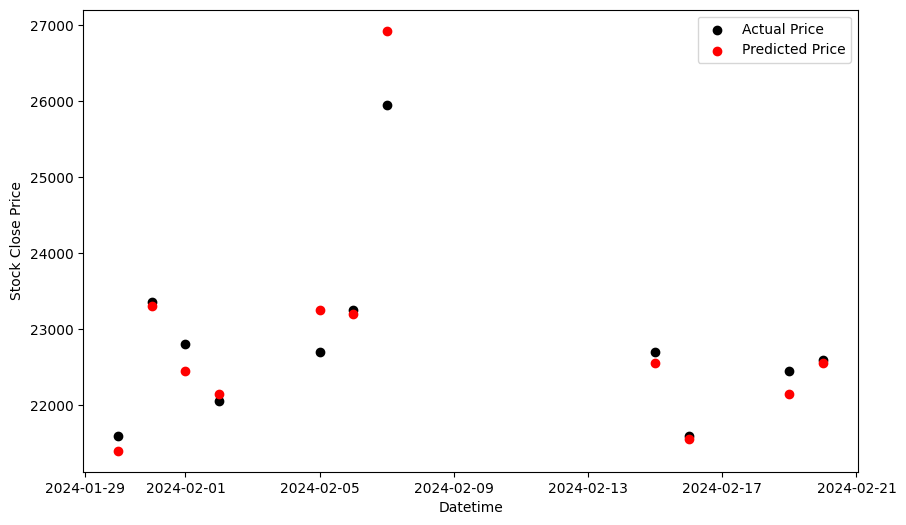

In [9]:

# Đảm bảo cột 'Datetime' được hiểu là kiểu dữ liệu datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Sắp xếp dataframe theo thời gian
data.sort_values(by='Datetime', inplace=True)

# Tạo một đặc trưng mới có thể là ngày (hoặc một đặc trưng khác) để sử dụng trong mô hình
# Trong ví dụ này, giả sử bạn muốn sử dụng giá mở (Open) làm đặc trưng
X = data[['Open']]

# Sử dụng cột 'Close' làm target
y = data['Close']

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Khởi tạo và huấn luyện mô hình cây quyết định
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Dự đoán giá cổ phiếu trên tập kiểm thử
predictions = model.predict(X_test)

# Đánh giá hiệu suất mô hình bằng cách sử dụng Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

plt.figure(figsize=(10, 6))

# Vẽ biểu đồ so sánh giữa giá thực tế và giá dự đoán
plt.scatter(data['Datetime'].iloc[-len(X_test):], y_test, color='black', label='Actual Price')
plt.scatter(data['Datetime'].iloc[-len(X_test):], predictions, color='red', label='Predicted Price')
plt.xlabel('Datetime')
plt.ylabel('Stock Close Price')
plt.legend()
plt.show()



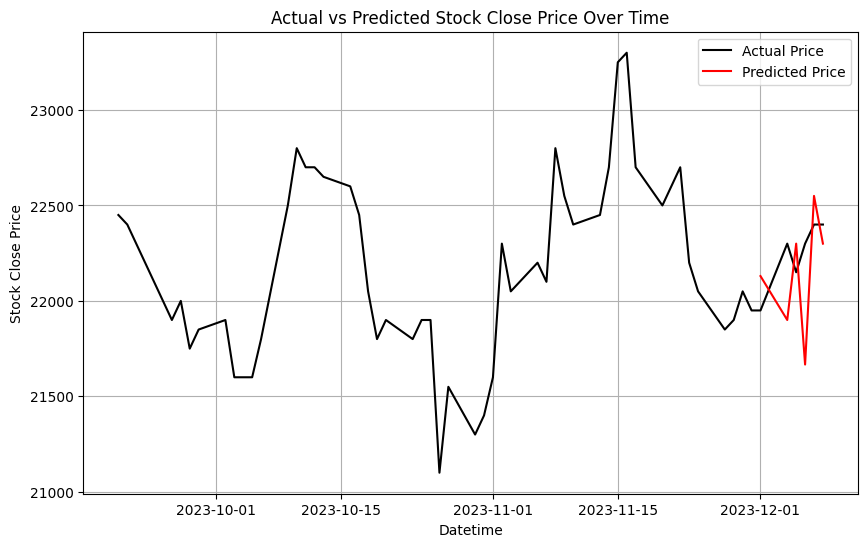

In [57]:
# Vẽ biểu đồ đường đi của giá cổ phiếu thực tế
plt.figure(figsize=(10, 6))
plt.plot(data['Datetime'], data['Close'], label='Actual Price', color='black')

# Vẽ biểu đồ đường đi của giá cổ phiếu dự đoán
plt.plot(data['Datetime'].iloc[-len(X_test):], predictions, label='Predicted Price', color='red')

plt.title('Actual vs Predicted Stock Close Price Over Time')
plt.xlabel('Datetime')
plt.ylabel('Stock Close Price')
plt.legend()
plt.grid(True)
plt.show()
